It's critical that the main statistic we use for our A/B test closely matches our unique business goal. Even though it's a typical measure, the "number of people clicking the button" may not give the whole picture. For a more in-depth examination, I would advise taking into account the subsequent metrics:

Primary Metric: Click-Through Rate (CTR):

Calculation: CTR = (Number of Clicks / Number of Impressions) * 100
Reasoning: CTR offers a more comprehensive view by considering the ratio of clicks to impressions. It helps gauge the effectiveness of the button in engaging users.

Derived Metric: Conversion Rate:

Calculation: Conversion Rate = (Number of Conversions / Number of Clicks) * 100
Reasoning: If our ultimate goal is user actions post-click (e.g., making a purchase, signing up), the conversion rate provides insights into how well the clicks lead to desired outcomes.

Derived Metric: Engagement Time:

Calculation: Average Engagement Time per User
Reasoning: If the button directs users to a new page or feature, measuring user engagement time can reveal how much time they spend, indicating interest or satisfaction.

Derived Metric: Bounce Rate:

Calculation: Bounce Rate = (Number of Single-Page Sessions / Total Number of Sessions) * 100
Reasoning: A high bounce rate may indicate that users, after clicking the button, are not finding what they expected. This is especially relevant if the button aims to guide users deeper into our site or app.

Derived Metric: User Retention:

Calculation: Percentage of users who return after clicking the button
Reasoning: If our goal is user retention or encouraging return visits, measuring how many users come back after interacting with the button is crucial for long-term success.

In choosing these metrics, it's important to ensure they align with our specific goals and user journey. Combining multiple metrics provides a more holistic view of the A/B test impact. Additionally, paying attention to statistical and practical significance ensures that any observed differences are not merely due to chance and are meaningful for our business.

In [1]:
import pandas as pd


In [3]:
initial_df = pd.read_csv('/content/AssignmentData(ab_test).csv')

In [9]:
initial_df.head()


,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control


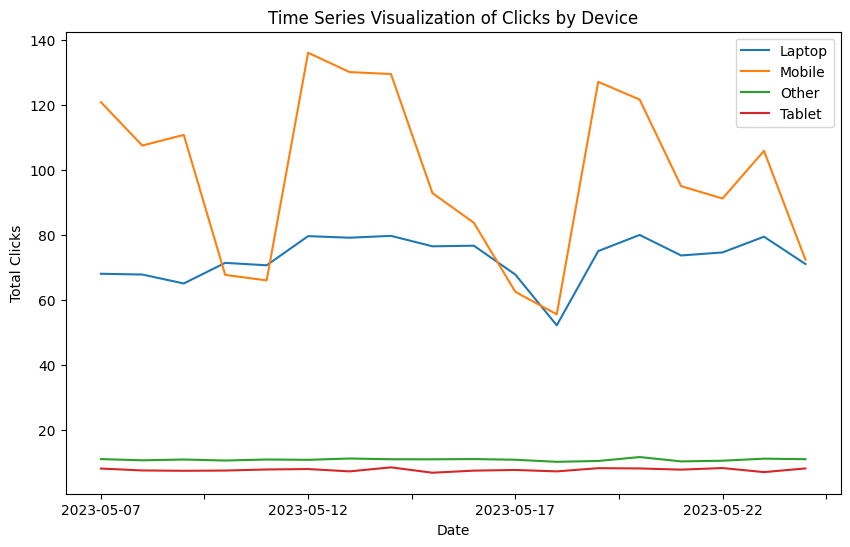

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = initial_df

# Creating a time series visualization
fig, ax = plt.subplots(figsize=(10, 6))

# trendlines
for device, device_df in df.groupby('Device'):
    device_df.groupby('Date')['Clicks'].mean().plot(label=device)

#plot labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Total Clicks')
ax.set_title('Time Series Visualization of Clicks by Device')
ax.legend()

#plot
plt.show()


We have the most number of clicks comming from Mobile phones it seems


from the visualization we can somewhat deduce that on 2023-05-12 the performance is better than average

In [10]:
# Identify the control group in the A/B test (replace 'Control' with the actual label)
my_control_group = df[df['Group'] == 'Control']

# Step 2: Count the total number of clicks in my control group (proxy for conversions)
total_conversions_in_control = my_control_group['Clicks'].sum()

# Step 3: Count the total number of users (observations) in my control group
total_users_in_my_control = my_control_group.shape[0]

# Step 4: Calculate the baseline conversion rate in my control group
my_baseline_conversion_rate = total_conversions_in_control / total_users_in_my_control

# Print the result
print(f"My Baseline Conversion Rate in the Control Group: {my_baseline_conversion_rate:.4f} or {my_baseline_conversion_rate * 100:.2f}%")


My Baseline Conversion Rate in the Control Group: 82.9399 or 8293.99%


As Per the Calculations the BCR is 82 and Statistical significance is 95%(given) and the MDE(minimum detectable efffect) is 3(given)

using sample size calculator from https://www.optimizely.com/sample-size-calculator/#/?conversion=82&effect=3&significance=95 we conclude that the sample size is more than enough as the required sample size is 3100.



In [11]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

def hypothesis_test(control_group_data, experiment_group_data, alpha=0.05):
    """
    Perform a hypothesis test to compare conversion rates between control and experiment groups.

    Parameters:
    - control_group_data: Pandas Series or NumPy array containing data for the control group (e.g., clicks).
    - experiment_group_data: Pandas Series or NumPy array containing data for the experiment group (e.g., clicks).
    - alpha: Significance level (default is 0.05 for 95% confidence).

    Returns:
    - A string indicating the conclusion: {"Experiment Group is Better", "Control Group is Better", "Indeterminate"}.
    """

    # Step 1: Count conversions and total users in each group
    conversions_control = control_group_data.sum()
    total_users_control = control_group_data.shape[0]

    conversions_experiment = experiment_group_data.sum()
    total_users_experiment = experiment_group_data.shape[0]

    # Step 2: Perform a two-sample proportion z-test
    z_stat, p_value = proportions_ztest([conversions_control, conversions_experiment],
                                        [total_users_control, total_users_experiment])

    # Step 3: Compare p-value with significance level
    if p_value < alpha:
        # Reject the null hypothesis
        if conversions_experiment / total_users_experiment > conversions_control / total_users_control:
            return "Experiment Group is Better"
        else:
            return "Control Group is Better"
    else:
        # Fail to reject the null hypothesis
        return "Indeterminate"

# Example usage with 'Clicks' data from your data frame
control_data = df[df['Group'] == 'Control']['Clicks']
experiment_data = df[df['Group'] == 'Experiment']['Clicks']

result = hypothesis_test(control_data, experiment_data)
print(f"Hypothesis Test Result: {result}")


Hypothesis Test Result: Indeterminate


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/proportion.py:1025: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)


as the output is indeterminate we need to do some further analysis to get what we need from the data so using some more data set will be beneficial if the result remain the same then we can conclude the test completed
